In [64]:
import pandas as pd
import numpy as np

In [65]:
df=pd.read_excel('C:\\Users\\vijay\\Downloads\\airfoil_self_noise project.xls')

In [66]:
df

,800.000000,0.000000,0.304800,71.300000,0.002663,126.201000
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571
...,...,...,...,...,...,...
1497,2500,15.6,0.1016,39.6,0.052849,110.264
1498,3150,15.6,0.1016,39.6,0.052849,109.254
1499,4000,15.6,0.1016,39.6,0.052849,106.604
1500,5000,15.6,0.1016,39.6,0.052849,106.224


In [67]:
df.columns = ['freq','aoa','cl','velocity','thickness','pressure']

df.columns

In [68]:
df.columns

Index(['freq', 'aoa', 'cl', 'velocity', 'thickness', 'pressure'], dtype='object')

In [69]:
df.head(5)

,freq,aoa,cl,velocity,thickness,pressure
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


In [70]:
df.sample()

,freq,aoa,cl,velocity,thickness,pressure
511,800,2.7,0.1524,71.3,0.002439,127.394


In [71]:
df.tail()

,freq,aoa,cl,velocity,thickness,pressure
1497,2500,15.6,0.1016,39.6,0.052849,110.264
1498,3150,15.6,0.1016,39.6,0.052849,109.254
1499,4000,15.6,0.1016,39.6,0.052849,106.604
1500,5000,15.6,0.1016,39.6,0.052849,106.224
1501,6300,15.6,0.1016,39.6,0.052849,104.204


<AxesSubplot:ylabel='Frequency'>

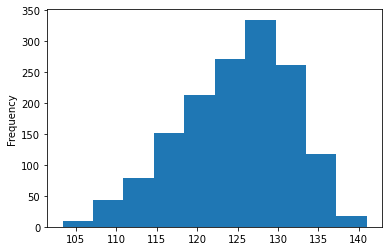

In [72]:
df['pressure'].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

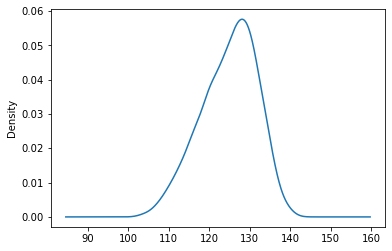

In [73]:
df['pressure'].plot(kind='kde')

<AxesSubplot:>

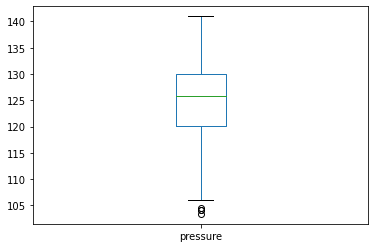

In [74]:
df['pressure'].plot(kind='box')

In [75]:
q1 = df['pressure'].quantile(.25)

In [76]:
q3 = df['pressure'].quantile(.75)

In [77]:
iqr=q3-q1

In [78]:
q3

129.99775

In [79]:
q1,iqr,q3

(120.19, 9.807749999999999, 129.99775)

In [80]:
ifn = q1-(1.5*iqr)

In [81]:
ofn = q3+(1.5*iqr)

In [82]:
df = df[(df['pressure']>=ifn) & (df['pressure']<=ofn)]

In [83]:
df

,freq,aoa,cl,velocity,thickness,pressure
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571
...,...,...,...,...,...,...
1496,2000,15.6,0.1016,39.6,0.052849,110.894
1497,2500,15.6,0.1016,39.6,0.052849,110.264
1498,3150,15.6,0.1016,39.6,0.052849,109.254
1499,4000,15.6,0.1016,39.6,0.052849,106.604


<AxesSubplot:ylabel='Frequency'>

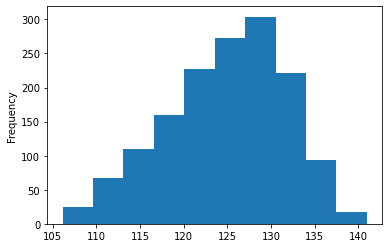

In [84]:
df['pressure'].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

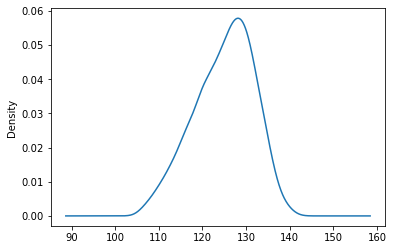

In [85]:
df['pressure'].plot(kind='kde')

<AxesSubplot:>

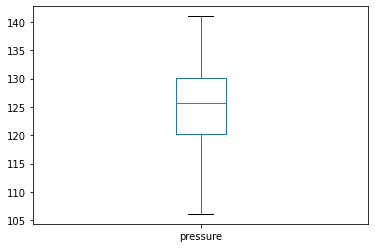

In [86]:
df['pressure'].plot(kind='box')

In [87]:
import seaborn as sns

In [88]:
df[['pressure','pressure']]

,pressure,pressure
0,125.201,125.201
1,125.951,125.951
2,127.591,127.591
3,127.461,127.461
4,125.571,125.571
...,...,...
1496,110.894,110.894
1497,110.264,110.264
1498,109.254,109.254
1499,106.604,106.604


In [89]:
df['pressure'].describe()

count    1498.000000
mean      124.890525
std         6.825809
min       106.111000
25%       120.227250
50%       125.725000
75%       130.019500
max       140.987000
Name: pressure, dtype: float64

In [91]:
df.corr()

,freq,aoa,cl,velocity,thickness,pressure
freq,1.000000,-0.276629,-0.002845,0.136105,-0.242011,-0.389364
aoa,-0.276629,1.000000,-0.505126,0.062112,0.756815,-0.149181
cl,-0.002845,-0.505126,1.000000,0.002287,-0.224484,-0.239304
velocity,0.136105,0.062112,0.002287,1.000000,0.003378,0.120746
thickness,-0.242011,0.756815,-0.224484,0.003378,1.000000,-0.292886
pressure,-0.389364,-0.149181,-0.239304,0.120746,-0.292886,1.000000


<AxesSubplot:>

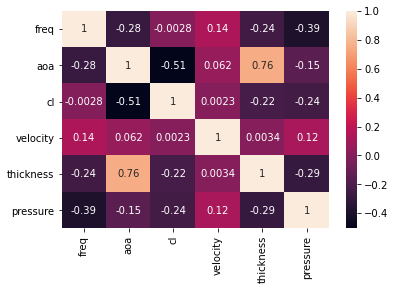

In [93]:
sns.heatmap(df.corr(),annot=True)

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [96]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [97]:
x

,freq,aoa,cl,velocity,thickness
0,1000,0.0,0.3048,71.3,0.002663
1,1250,0.0,0.3048,71.3,0.002663
2,1600,0.0,0.3048,71.3,0.002663
3,2000,0.0,0.3048,71.3,0.002663
4,2500,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1496,2000,15.6,0.1016,39.6,0.052849
1497,2500,15.6,0.1016,39.6,0.052849
1498,3150,15.6,0.1016,39.6,0.052849
1499,4000,15.6,0.1016,39.6,0.052849


In [98]:
y

0       125.201
1       125.951
2       127.591
3       127.461
4       125.571
         ...   
1496    110.894
1497    110.264
1498    109.254
1499    106.604
1500    106.224
Name: pressure, Length: 1498, dtype: float64

In [116]:
xtr,xts,ytr,yts = train_test_split(x,y,train_size = 0.7,random_state = 2)

In [117]:
xtr,xts,ytr,yts

(       freq   aoa      cl  velocity  thickness
 1394    315   8.9  0.1016      39.6   0.012460
 399    2000   7.3  0.2286      71.3   0.010440
 994    1250   0.0  0.0254      31.7   0.000439
 279    2500   2.0  0.2286      39.6   0.003466
 301    1000   4.0  0.2286      71.3   0.004006
 ...     ...   ...     ...       ...        ...
 466   16000   0.0  0.1524      71.3   0.001599
 299     630   4.0  0.2286      71.3   0.004006
 493    5000   0.0  0.1524      39.6   0.001933
 527     800   2.7  0.1524      39.6   0.002948
 1195    250  17.4  0.0254      31.7   0.017663
 
 [1048 rows x 5 columns],
       freq   aoa      cl  velocity  thickness
 1323  2000   3.3  0.1016      39.6   0.002451
 906    630  15.4  0.0508      39.6   0.028259
 1278  8000   0.0  0.1016      39.6   0.001463
 69    2000   1.5  0.3048      71.3   0.003367
 272    500   2.0  0.2286      39.6   0.003466
 ...    ...   ...     ...       ...        ...
 708    200  12.6  0.1524      39.6   0.058411
 60    4000   0.0  0

In [118]:
lr = LinearRegression().fit(xtr,ytr)

In [119]:
lr

LinearRegression()

In [122]:
prd_tr_y = lr.predict(xtr)

In [123]:
prd_ts_y = lr.predict(xts)

In [124]:
from sklearn.metrics import mean_squared_error as mse

In [125]:
rmsetr = np.sqrt(mse(prd_tr_y,ytr))

In [126]:
rmsets = np.sqrt(mse(prd_ts_y,yts))

In [127]:
rmsetr

4.814612457042733

In [128]:
rmsets

4.772978406441058

In [129]:
#Scaling to make all variables into same scale

In [130]:
from sklearn.preprocessing import StandardScaler as ss

In [131]:
sc = ss().fit(xtr)

In [158]:
sctr = sc.transform(xtr)

In [159]:
scts = sc.transform(xts)

In [160]:
sctr = pd.DataFrame(data = sctr,columns = xtr.columns)

In [161]:
scts = pd.DataFrame(data = scts,columns = xts.columns)

In [143]:
sctr.head()

,freq,aoa,cl,velocity,thickness
0,-0.817983,0.354569,-0.384749,-0.716430,0.100433
1,-0.293432,0.082218,0.967421,1.318518,-0.055998
2,-0.526912,-1.160379,-1.196052,-1.223562,-0.830786
3,-0.137780,-0.819942,0.967421,-0.716430,-0.596336
4,-0.604738,-0.479504,0.967421,1.318518,-0.554479


In [142]:
xtr.head()

,freq,aoa,cl,velocity,thickness
1394,315,8.9,0.1016,39.6,0.012460
399,2000,7.3,0.2286,71.3,0.010440
994,1250,0.0,0.0254,31.7,0.000439
279,2500,2.0,0.2286,39.6,0.003466
301,1000,4.0,0.2286,71.3,0.004006


In [144]:
lr = LinearRegression().fit(sctr,ytr)

In [146]:
lr

LinearRegression()

In [147]:
prd_tr_y = lr.predict(sctr)

In [148]:
prd_ts_y = lr.predict(scts)

In [149]:
from sklearn.metrics import mean_squared_error as mse

In [150]:
rmsetr = np.sqrt(mse(prd_tr_y,ytr))

In [151]:
rmsets = np.sqrt(mse(prd_ts_y,yts))

In [152]:
rmsetr

4.814612457042733

In [153]:
rmsets

4.7729784064410445

In [154]:
from sklearn.decomposition import PCA

In [155]:
pc = PCA().fit(sctr)

In [156]:
pc

PCA()

In [162]:
pctr = pc.transform(sctr)

In [163]:
pcts = pc.transform(scts)

In [169]:
pc.explained_variance_ratio_

array([0.42903289, 0.22758151, 0.180742  , 0.12944267, 0.03320092])

In [170]:
pc.explained_variance_ratio_.cumsum()

array([0.42903289, 0.65661441, 0.83735641, 0.96679908, 1.        ])

In [172]:
pctr = pd.DataFrame(data = pctr,columns = ['PC1','PC2','PC3','PC4','PC5'])

In [173]:
pcts = pd.DataFrame(data = pcts,columns = ['PC1','PC2','PC3','PC4','PC5'])

In [174]:
lr = LinearRegression().fit(pctr,ytr)

In [175]:
lr

LinearRegression()

In [176]:
prd_tr_y = lr.predict(pctr)

In [177]:
prd_ts_y = lr.predict(pcts)

In [178]:
from sklearn.metrics import mean_squared_error as mse

In [179]:
rmsetr = np.sqrt(mse(prd_tr_y,ytr))

In [180]:
rmsets = np.sqrt(mse(prd_ts_y,yts))

In [181]:
rmsetr

4.814612457042733

In [182]:
rmsets

4.7729784064410445

In [183]:
import os

In [186]:
os.getcwd

'.'